In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.drop(['CustomerID','Gender'], axis=1, inplace=True)

In [ ]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
#df = df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})
df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [ ]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
df.shape

(200, 3)

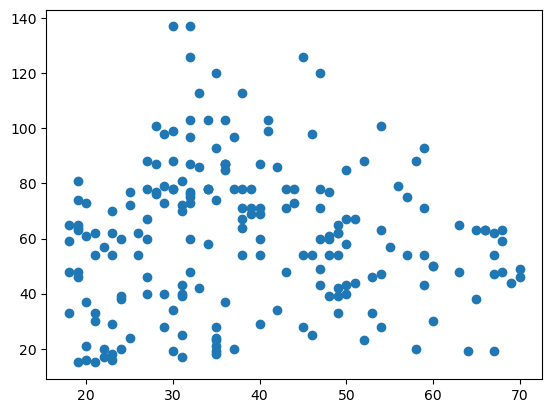

In [ ]:
plt.scatter(df.age, df.income)

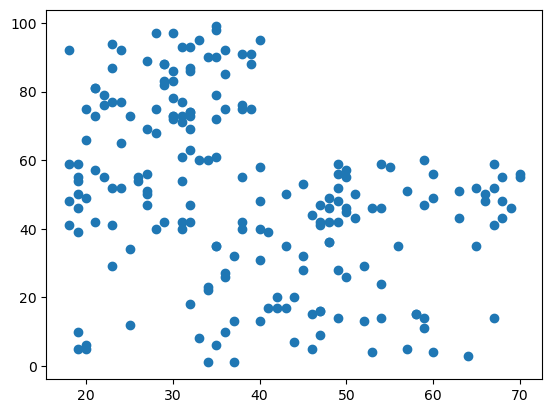

In [ ]:
plt.scatter(df.age, df.score)

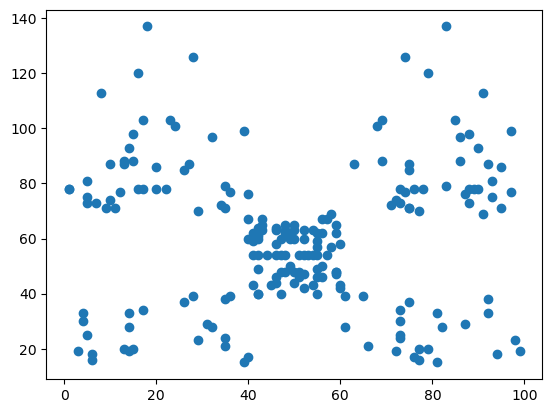

In [ ]:
plt.scatter(df.score, df.income)

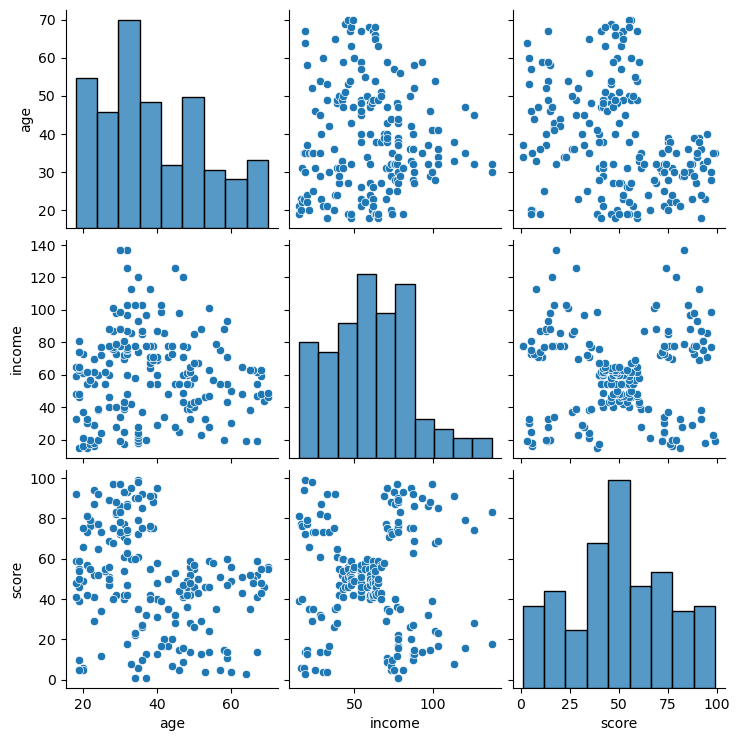

In [ ]:
import seaborn as sns
sns.pairplot(df[['age','income','score']])
plt.savefig('image.png')

# KMEANS CLUSTER

Text(0.5, 1.0, 'income and score plot of cutomres')

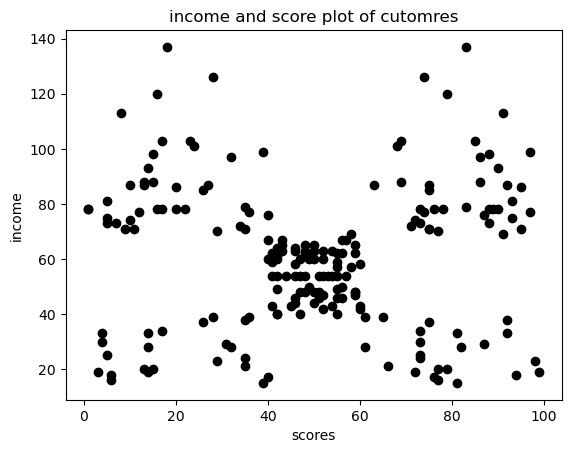

In [ ]:
plt.scatter(df.score, df.income, color='black')
plt.xlabel('scores')
plt.ylabel('income')
plt.title('income and score plot of cutomres') #https://prnt.sc/SuRtEtVwydhu

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans() #default number of clusters=8

Download this file: https://github.com/rashakil-ds/Top-Data-Science-AI-Book-Collection/blob/main/Clustering%20Algorithms.pdf

In [ ]:
#km.fit_predict(df[['score', 'income']]) # training model

In [ ]:
km.fit(df[['score', 'income']])

KMeans()

In [ ]:
km.cluster_centers_

array([[ 81.        ,  24.95      ],
       [ 48.24528302,  61.30188679],
       [ 14.29166667,  79.70833333],
       [ 82.        , 109.7       ],
       [ 19.52380952,  25.14285714],
       [ 82.17241379,  78.55172414],
       [ 51.12121212,  43.96969697],
       [ 22.        , 109.7       ]])

In [ ]:
df['Group1'] = km.predict(df[['score', 'income']])
df.head()

,age,income,score,Group1
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4


In [ ]:
df0 = df[df.Group1 == 0]
df1 = df[df.Group1 == 1]
df2 = df[df.Group1 == 2]
df3 = df[df.Group1 == 3]
df4 = df[df.Group1 == 4]
df5 = df[df.Group1 == 5]
df6 = df[df.Group1 == 6]
df7 = df[df.Group1 == 7]

In [ ]:
df0.head()

,age,income,score,Group1
1,21,15,81,0
3,23,16,77,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0


In [ ]:
df2.head()

,age,income,score,Group1
124,23,70,29,2
128,59,71,11,2
130,47,71,9,2
134,20,73,5,2
136,44,73,7,2


In [ ]:
centroid = km.cluster_centers_
centroid

array([[ 81.        ,  24.95      ],
       [ 48.24528302,  61.30188679],
       [ 14.29166667,  79.70833333],
       [ 82.        , 109.7       ],
       [ 19.52380952,  25.14285714],
       [ 82.17241379,  78.55172414],
       [ 51.12121212,  43.96969697],
       [ 22.        , 109.7       ]])

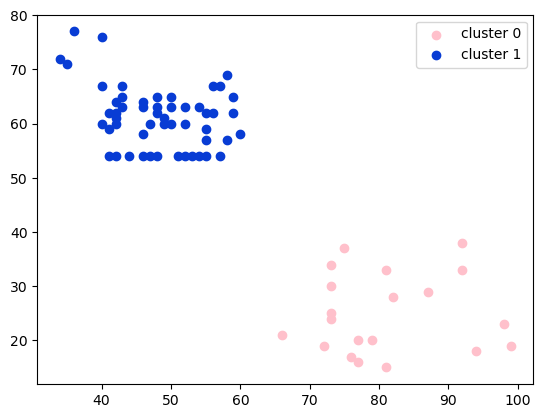

In [ ]:
plt.scatter(df0.score, df0.income, color='pink', label='cluster 0')
plt.scatter(df1.score, df1.income, color='#083CD4', label='cluster 1')
plt.legend()

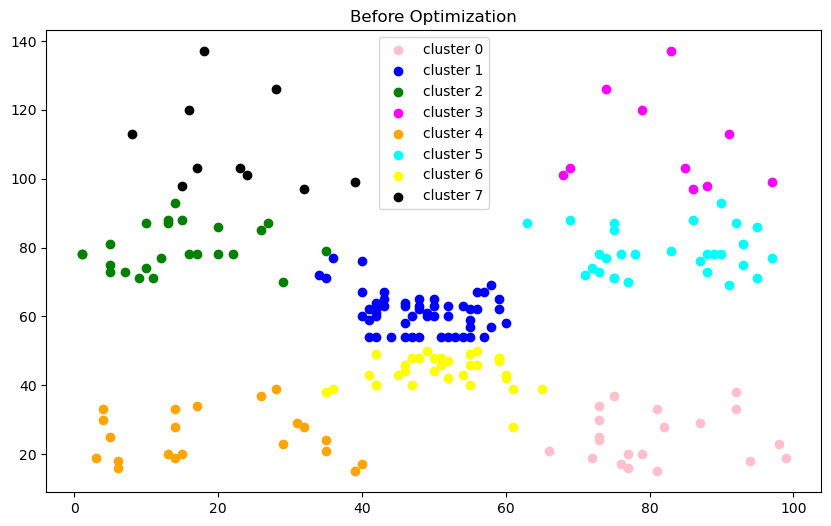

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(df0.score, df0.income, color='pink', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')
plt.scatter(df5.score, df5.income, color='cyan', label='cluster 5')
plt.scatter(df6.score, df6.income, color='yellow', label='cluster 6')
plt.scatter(df7.score, df7.income, color='black', label='cluster 7')

#plt.scatter(centroid[:, 0], centroid[:,1], color='red', label='centroid')

plt.title('Before Optimization') #https://prnt.sc/oAzguSSV1TNH

plt.legend()

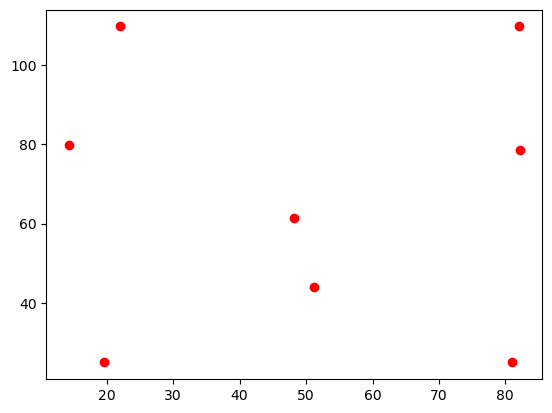

In [ ]:
plt.scatter(centroid[:, 0], centroid[:,1], color='red', label='centroid')

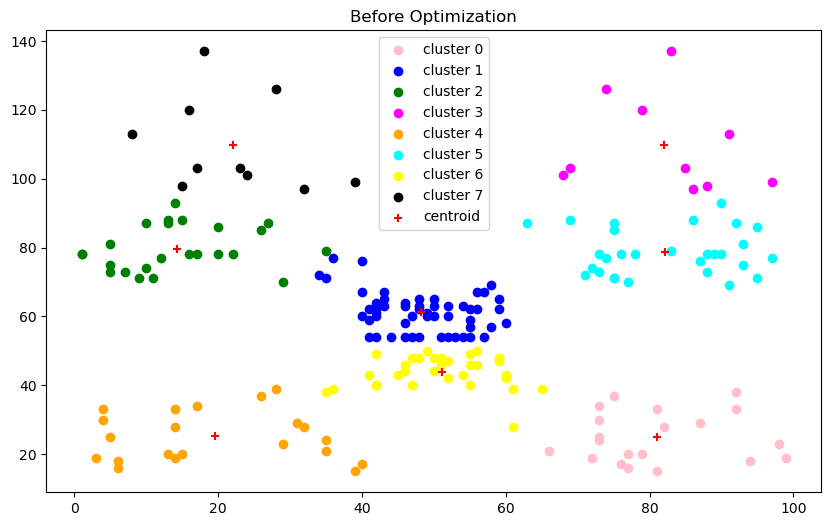

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(df0.score, df0.income, color='pink', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')
plt.scatter(df5.score, df5.income, color='cyan', label='cluster 5')
plt.scatter(df6.score, df6.income, color='yellow', label='cluster 6')
plt.scatter(df7.score, df7.income, color='black', label='cluster 7')

plt.scatter(centroid[:, 0], centroid[:,1], color='red', label='centroid', marker='+')

plt.title('Before Optimization') #https://prnt.sc/oAzguSSV1TNH

plt.legend()

# Objective Function

Objective function of k-means clustering:
J = ∑_{i=1}^{k} ∑_{x ∈ C_i} ||x - μ_i||^2

Where:
- k is the number of clusters.
- C_i represents the i-th cluster.
- μ_i is the centroid (mean) of cluster C_i.
- ||x - μ_i||^2 represents the squared Euclidean distance between data point x and the centroid μ_i of its assigned cluster.


In [ ]:
km.inertia_

25063.652515864094

# Optimizing KMENAS

In [ ]:
wcss = []
cluster = range(1,15)

for k in cluster:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['score', 'income']])
    wcss.append(km2.inertia_)

In [ ]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30241.343617936593,
 25028.02047526941,
 21829.135638779822,
 19669.71099830122,
 17586.632447340515,
 16038.15357495807,
 14314.98023381847,
 13186.28596312899]

Text(0.5, 0, 'Cluster')

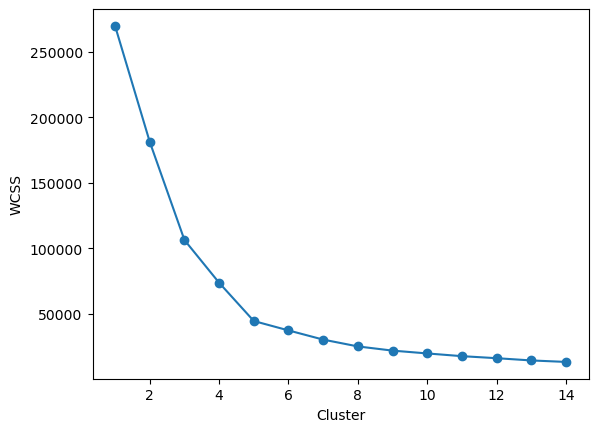

In [ ]:
plt.plot(range(1,15), wcss, marker='o') #line plot
plt.ylabel('WCSS')
plt.xlabel('Cluster')

In [ ]:
#!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kn = KneeLocator(cluster, wcss, direction='decreasing', curve='convex')

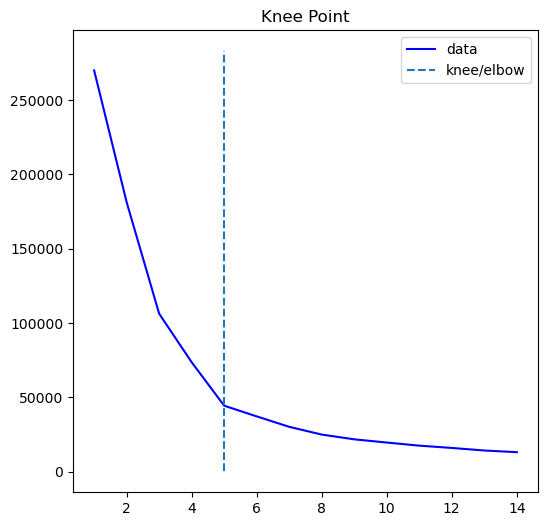

In [ ]:
kn.plot_knee()

In [ ]:
kn.knee

5

# After Optimizing

In [ ]:
km = KMeans(n_clusters=5) #i know 5 is optimal
df['Group2'] = km.fit_predict(df[['score', 'income']]) #fit_predict()

In [ ]:
df.head()

,age,income,score,Group1,Group2
0,19,15,39,4,4
1,21,15,81,0,1
2,20,16,6,4,4
3,23,16,77,0,1
4,31,17,40,4,4


In [ ]:
cen = km.cluster_centers_
cen

array([[49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783]])

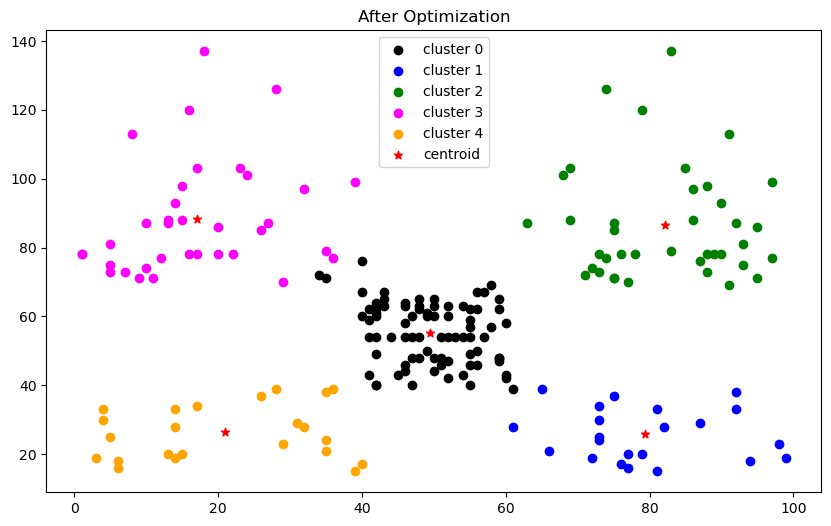

In [ ]:
df0 = df[df.Group2 == 0]
df1 = df[df.Group2 == 1]
df2 = df[df.Group2 == 2]
df3 = df[df.Group2 == 3]
df4 = df[df.Group2 == 4]

plt.figure(figsize=(10,6))
plt.scatter(df0.score, df0.income, color='black', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')

plt.scatter(cen[:, 0], cen[:,1], color='red', label='centroid', marker='*')
plt.title('After Optimization')

plt.legend()

In [ ]:
km.inertia_

44448.45544793371